In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

D:\softwares\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\softwares\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
data=pd.read_csv('Cancerwiscon.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop("id",axis=1,inplace=True)

In [6]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

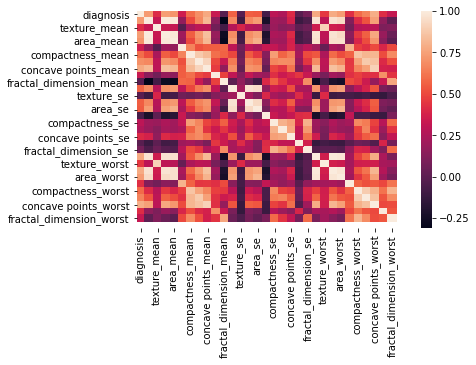

In [8]:
corr=data.corr()
sns.heatmap(corr)

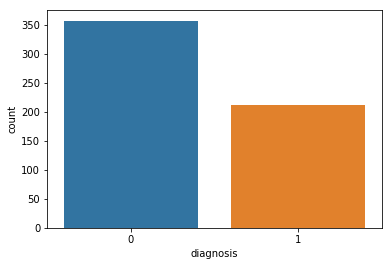

In [9]:
sns.countplot(data['diagnosis'],label='count')

In [10]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [13]:
train_x=train.iloc[:,1:-1]
train_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,19.80,25.05,130.0,1210.0,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469
339,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,0.05506,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
184,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.8,973.1,0.1301,0.3299,0.3630,0.1226,0.3175,0.09772
423,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,0.1848,0.06181,...,15.14,25.50,101.4,708.8,0.1147,0.3167,0.3660,0.1407,0.2744,0.08839
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,23.73,25.23,160.5,1646.0,0.1417,0.3309,0.4185,0.1613,0.2549,0.09136


In [14]:
train_y=train['diagnosis']

In [15]:
test_x=test.iloc[:,1:-1]
test_y=test['diagnosis']

In [16]:
logistic=LogisticRegression()
logistic.fit(train_x,train_y)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred=logistic.predict(test_x)
metrics.accuracy_score(y_pred,test_y)

0.9473684210526315

In [25]:
Xf=poly.fit_transform(X)
predictf=poly.fit_transform(predict.reshape(-1,1))

In [42]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
datas = pd.DataFrame({'sno':np.arange(0,6),'Temperature':np.linspace(0,100,6),'Pressure':[0.0002,0.0012,0.0060,0.300,0.0900,0.2700]})
datas 

,sno,Temperature,Pressure
0,0,0.0,0.0002
1,1,20.0,0.0012
2,2,40.0,0.0060
3,3,60.0,0.3000
4,4,80.0,0.0900
5,5,100.0,0.2700


In [43]:
X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = linear_model.LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

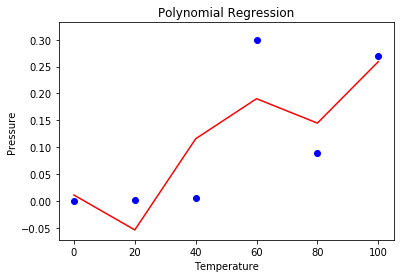

In [46]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [56]:
tt=np.array(110).reshape(1, -1)

In [57]:
lin2.predict(poly.fit_transform(tt))

array([0.54642975])

In [58]:
data2=pd.read_csv('pacific.csv')
data2.head(6)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,EP011949,UNNAMED,19490612,600,,TS,20.5N,109.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [69]:
data2.Status=pd.Categorical(data2.Status).codes

In [70]:
data2.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,11,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,11,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,11,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,11,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,11,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


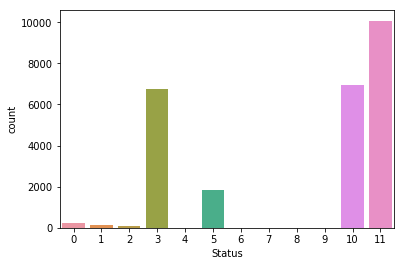

In [71]:
sns.countplot(data2['Status'],label="Count")
plt.show()

In [81]:
pred_columns=data2[:]

In [82]:
pred_columns

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,11,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,11,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,11,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,11,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,11,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,EP011949,UNNAMED,19490612,600,,11,20.5N,109.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,EP011949,UNNAMED,19490612,1200,,11,20.6N,110.2W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,EP021949,UNNAMED,19490617,1200,,11,14.1N,107.0W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,EP021949,UNNAMED,19490617,1800,,11,14.6N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,EP021949,UNNAMED,19490618,0,,11,15.0N,108.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [83]:
pred_columns.drop(columns=['Status','Event','Latitude','Longitude','ID','Name'],axis=1,inplace=True)

D:\softwares\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [84]:
prediction_var=pred_columns.columns
print(list(prediction_var))

['Date', 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [85]:
train,test=train_test_split(data2,test_size=0.3)
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [87]:
train_x=train[prediction_var]

In [89]:
train_y=train['Status']
test_x=test[prediction_var]
test_y=test['Status']

In [90]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(train_x,train_y)

D:\softwares\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
y_pred=model.predict(test_x)

In [92]:
pd.DataFrame(y_pred,test_y)

,0
Status,
3,3
11,11
11,11
10,10
11,11
5,5
11,11
11,11
3,3


In [94]:
metrics.accuracy_score(test_y,y_pred)

0.966590155572558

In [95]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)

In [97]:
model.fit(train_x,train_y)
y_pred2=model.predict(test_x)

In [101]:
metrics.accuracy_score(test_y,y_pred2)

0.9584289722009691